# Wellington: NZ's Food Capital?

In [1]:
#! pip install pandas
#! pip install numpy
#! pip install requests
#! pip install beautifulsoup4
#! pip install geocoder
#!pip install folium
#!pip install seaborn

import json
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import geocoder
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

## 1 Introduction

### 1.1 Background

**A description of the problem and a discussion of the background. (15 marks)**

Wellington is the capital city of New Zealand (NZ). Despites its smaller size and population compared to NZ's largest city Auckland (303 km^2 and 607 km^2 respectively [4, 5]), it also has the reputation of being NZ's 'Food Capital'. Even being desribed as the world's best food city [1, 2, 3]. The problem with these articles is that they are purely subjective. Can consumers, especially tourists that could spend large amounts of money to travel Wellington trust they are getting the best food expereince in New Zealand? I am interested in understanding if the geographical contraints, specifically population density, of Wellington contribute to its 'Food Scene' using Auckland as a comparison? Understanding if cities truely have unqiue food experiences is essential for maintaining the image and reputation of a city for tourism.

Specifically, does Wellington have a unique food venue profile, and does it provide a 'better' food venue profile than the more populous city Auckland?

### 1.2 Datasets

**A description of the data and how it will be used to solve the problem. (15 marks)**

By combining the number, type and popularity of venues with their populations I hope to understand if Wellington is providing a better food experience per capita. Additionally I aim to test if a higher population offers a more diverse food experience.

#### Data set 1 - Suburb & Population Data
1 - Population information for Wellington and Auckland suburbs available via the 'City Population' website [6, 7]. This data contains the suburb locations, along with their area size and populations. This information will help to establish if geographical constraints and populations affect the types of restaurant venues and their popularity.

In [2]:
# Foursqure details
CLIENT_ID = '' 
CLIENT_SECRET = '' 
VERSION = '20180605'
LIMIT = 100

In [3]:
#wellington = geocoder.arcgis("Wellington, New Zealand")
#print(f"Wellington -Latitude: {wellington.latlng[0]}, Longitude: {wellington.latlng[1]}")
wellington = (-41.28489352399998, 174.77610046600012)

In [4]:
#df_wellington_population = pd.read_csv('wellington_population.csv')
##Drop suburbs not in Wellington city, and onyl take latest population numbers
#df_wellington_population = df_wellington_population[df_wellington_population['Unnamed: 1'] == 'Wellington']
#df_wellington_population = df_wellington_population[['Suburb', '2020']]
#df_wellington_population.rename(columns={'2020': 'Population'}, inplace=True)
#latlng = [(geocoder.arcgis(f'{i}, Wellington, New Zealand')).latlng for i in df_wellington_population['Suburb']]
#df_wellington_population['latitude'] = [i[0] for i in latlng]
#df_wellington_population['longitude'] = [i[1] for i in latlng]
#df_wellington_population.to_csv('df_wellington_population.csv', index=False)
#df_wellington_population.head()
df_wellington_population = pd.read_csv('df_wellington_population.csv')
df_suburb_area = pd.read_csv('sa2.csv')
df_wellington_population = df_wellington_population.merge(df_suburb_area, left_on='Suburb', right_on='SA22018_V1_NAME')
df_wellington_population = df_wellington_population[['Suburb', 'Population', 'latitude', 'longitude', 'AREA_SQ_KM']]
df_wellington_population['Population'] = df_wellington_population['Population'].str.replace(',', '').astype(int)
df_wellington_population['PopulationDensity'] = df_wellington_population['Population'] / df_wellington_population['AREA_SQ_KM']
df_wellington_population['PopulationDensity'] = df_wellington_population['PopulationDensity'].astype(int)
df_wellington_population.head()

Suburb  Population   latitude   longitude  AREA_SQ_KM  \
0      Aro Valley        4090 -41.295293  174.761548    1.246436   
1      Berhampore        4040 -41.323389  174.775316    1.397075   
2    Broadmeadows        1720 -41.233295  174.791910    0.640288   
3   Brooklyn East        2780 -41.297445  174.769366    0.905140   
4  Brooklyn North        2320 -41.297445  174.769366    1.243532   

   PopulationDensity  
0               3281  
1               2891  
2               2686  
3               3071  
4               1865

In [5]:
map_wellington = folium.Map(location=[-41.28489352399998, 174.77610046600012], zoom_start=12)
for lat, lng, suburb, pop_dnt in zip(df_wellington_population['latitude'], df_wellington_population['longitude'], df_wellington_population['Suburb'], df_wellington_population['PopulationDensity']):
    label = '{}, {} people/sq_km'.format(suburb, pop_dnt)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_wellington)
map_wellington

In [6]:
#auckland = geocoder.arcgis("Auckland, New Zealand")
#print(f"Auckland -Latitude: {auckland.latlng[0]}, Longitude: {auckland.latlng[1]}")
auckland = (-36.84837877599995, 174.76438177700004)

In [7]:
#df_auckland_population = pd.read_csv('auckland_population.csv')
##Drop suburbs not in Auckland city, and only take latest population numbers
#df_auckland_population = df_auckland_population[['Suburb', '2020']]
#df_auckland_population.rename(columns={'2020': 'Population'}, inplace=True)
#latlng = [(geocoder.arcgis(f'{i}, Auckland, New Zealand')).latlng for i in df_auckland_population['Suburb']]
#df_auckland_population['latitude'] = [i[0] for i in latlng]
#df_auckland_population['longitude'] = [i[1] for i in latlng]
#df_auckland_population.to_csv('df_auckland_population.csv', index=False)
#df_auckland_population.head()
df_auckland_population = pd.read_csv('df_auckland_population.csv')
#df_suburb_area = pd.read_csv('sa2.csv')
df_auckland_population = df_auckland_population.merge(df_suburb_area, left_on='Suburb', right_on='SA22018_V1_NAME')
df_auckland_population = df_auckland_population[['Suburb', 'Population', 'latitude', 'longitude', 'AREA_SQ_KM']]
df_auckland_population['Population'] = df_auckland_population['Population'].str.replace(',', '').astype(int)
df_auckland_population['PopulationDensity'] = df_auckland_population['Population'] / df_auckland_population['AREA_SQ_KM']
df_auckland_population['PopulationDensity'] = df_auckland_population['PopulationDensity'].astype(int)
df_auckland_population.head()

Suburb  Population   latitude   longitude  AREA_SQ_KM  \
0        Akoranga        1290 -36.795381  174.753052    1.162911   
1  Albany Central         800 -36.848055  174.735100    3.210054   
2  Albany Heights        3790 -36.716019  174.692897    3.104010   
3    Albany South        3620 -36.848055  174.735100    1.485657   
4     Albany West        2920 -36.848055  174.735100    2.056849   

   PopulationDensity  
0               1109  
1                249  
2               1221  
3               2436  
4               1419

In [8]:
map_auckland = folium.Map(location=[-36.84837877599995, 174.76438177700004], zoom_start=12)
for lat, lng, suburb, pop_dnt in zip(df_auckland_population['latitude'], df_auckland_population['longitude'], df_auckland_population['Suburb'], df_auckland_population['PopulationDensity']):
    label = '{}, {} people/sq_km'.format(suburb, pop_dnt)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_auckland)
map_auckland

#### Dataset 2 - Forsquare Venue & Likes Data
2 - Venue information available via the Foursquare API. Specifically, the venue category, location and likes. These data provides the type of restaurant venues in each suburb for Auckland and Wellington as well as the 'Likes' as a measure of popularity.

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
        'Neighbourhood', 
        'Neighbourhood Latitude', 
        'Neighbourhood Longitude', 
        'Venue ID',
        'Venue', 
        'Venue Latitude', 
        'Venue Longitude', 
        'Venue Category']

    return(nearby_venues)

In [10]:
#wellington_data = getNearbyVenues(
#    names=df_wellington_population['Suburb'],
#    latitudes=df_wellington_population['latitude'],
#    longitudes=df_wellington_population['longitude'])
#wellington_data.to_csv('wellington_data.csv', index=False)
wellington_data = pd.read_csv('wellington_data.csv')
wellington_data = wellington_data.drop_duplicates(subset=['Venue'])
wellington_data.rename(columns={'Neighbourhood': 'Suburb', 'Neighbourhood Latitude': 'Latitude', 'Neighbourhood Longitude': 'Longitude'}, inplace=True)
#print(wellington_data.shape)
#wellington_data.head()
#: Note: Only keep venues that are 'Food' types.
wellington_food = wellington_data[wellington_data['Venue Category'].str.contains('Bar|Restaurant|Cafe|Burger|Pizza|Bakery|Brewery|Pub|Gastropub|Noodle|Chocolate|Bagel|Pie|Fish|Food|Sandwich|Ice Cream|Salad|Steak|BBQ')]
print(wellington_food.shape)
wellington_food.head()

(269, 8)


Suburb   Latitude   Longitude                  Venue ID  \
0  Aro Valley -41.295293  174.761548  5622f728498e8bba5b083c62   
1  Aro Valley -41.295293  174.761548  4b10c544f964a5209a7523e3   
5  Aro Valley -41.295293  174.761548  4b0b91daf964a520513223e3   
6  Aro Valley -41.295293  174.761548  4b058778f964a5204d9422e3   
8  Berhampore -41.323389  174.775316  57f4a907498e7203206e0e3a   

                      Venue  Venue Latitude  Venue Longitude  \
0    Garage Project Taproom      -41.295338       174.766854   
1                  Aro Cafe      -41.295319       174.766924   
5  Te Aro Fish Supplies Ltd      -41.295356       174.767008   
6                   Arobake      -41.295322       174.767186   
8             The Paperboat      -41.320034       174.775560   

               Venue Category  
0                    Beer Bar  
1                        Cafe  
5                 Fish Market  
6                      Bakery  
8  Modern European Restaurant

In [11]:
#auckland_data = getNearbyVenues(
#    names=df_auckland_population['Suburb'],
#    latitudes=df_auckland_population['latitude'],
#    longitudes=df_auckland_population['longitude'])
#auckland_data.to_csv('auckland_data.csv', index=False)
auckland_data = pd.read_csv('auckland_data.csv')
auckland_data = auckland_data.drop_duplicates(subset=['Venue'])
auckland_data.rename(columns={'Neighbourhood': 'Suburb', 'Neighbourhood Latitude': 'Latitude', 'Neighbourhood Longitude': 'Longitude'}, inplace=True)
#print(auckland_data.shape)
#: Note: Only keep venues that are 'Food' types.
auckland_food = auckland_data[auckland_data['Venue Category'].str.contains('Bar|Restaurant|Cafe|Burger|Pizza|Bakery|Brewery|Pub|Gastropub|Noodle|Chocolate|Bagel|Pie|Fish|Food|Sandwich|Ice Cream|Salad|Steak|BBQ')]
print(auckland_food.shape)
auckland_food.head()

(532, 8)


Suburb   Latitude   Longitude                  Venue ID  \
0        Akoranga -36.795381  174.753052  4bb9a266b35776b0460bca01   
2        Akoranga -36.795381  174.753052  4cd9917753a7f04dd0fd6816   
5  Albany Central -36.848055  174.735100  5369d967498e6813f3ceb4a9   
7  Albany Central -36.848055  174.735100  5188ba6a498ef922678318a7   
8  Albany Central -36.848055  174.735100  4b555951f964a5202de227e3   

        Venue  Venue Latitude  Venue Longitude        Venue Category  
0  McDonald's      -36.792846       174.748569  Fast Food Restaurant  
2      Subway      -36.796715       174.757168        Sandwich Place  
5   Fishsmith      -36.845485       174.735505  Fast Food Restaurant  
7      Janken      -36.845239       174.737405   Japanese Restaurant  
8     Andiamo      -36.845449       174.735870    Italian Restaurant

In [12]:
def getVenueLikes(venue_ids):
    venues_list=[]
    for v_id in venue_ids:
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}/likes?&client_id={}&client_secret={}&v={}&limit={}'.format(
            v_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            LIMIT)
            
        # make the GET request
        try:
            likes = requests.get(url).json()['response']['likes']['count']
            venues_list.append((
                v_id, 
                likes))
        except:
            continue

    venue_likes = pd.DataFrame([item for item in venues_list])
    venue_likes.columns = [
        'Venue ID',
        'likes']

    return(venue_likes)

In [13]:
## Select 500 restaurants to avoid hitting Forsquare rate limtits
#mask = np.zeros(532, dtype=int)
#mask[:500] = 1
#np.random.shuffle(mask)
#mask = mask.astype(bool)

#auckland_food = auckland_food[mask]
#auckland_likes = getVenueLikes(auckland_food['Venue ID'])
#auckland_likes.to_csv('auckland_likes.csv')
auckland_likes = pd.read_csv('auckland_likes.csv')
auckland_likes.head()

Venue ID  likes
0  4bb9a266b35776b0460bca01      7
1  4cd9917753a7f04dd0fd6816      0
2  5369d967498e6813f3ceb4a9     14
3  5188ba6a498ef922678318a7     11
4  4b555951f964a5202de227e3     17

In [14]:
#wellington_likes = getVenueLikes(wellington_food['Venue'])
#wellington_likes.to_csv('wellington_likes.csv', index=False)
wellington_likes = pd.read_csv('wellington_likes.csv')
wellington_likes.head()

Venue ID  likes
0  5622f728498e8bba5b083c62     41
1  4b10c544f964a5209a7523e3     21
2  4b0b91daf964a520513223e3      5
3  4b058778f964a5204d9422e3      5
4  57f4a907498e7203206e0e3a      1

### Final prepared datasets

In [15]:
df_auck = auckland_likes.merge(auckland_food, how='left', on='Venue ID')
df_auck['City'] = 'Auckland'
print(df_auck.shape)
df_auck.head()

(500, 10)


Venue ID  likes          Suburb   Latitude   Longitude  \
0  4bb9a266b35776b0460bca01      7        Akoranga -36.795381  174.753052   
1  4cd9917753a7f04dd0fd6816      0        Akoranga -36.795381  174.753052   
2  5369d967498e6813f3ceb4a9     14  Albany Central -36.848055  174.735100   
3  5188ba6a498ef922678318a7     11  Albany Central -36.848055  174.735100   
4  4b555951f964a5202de227e3     17  Albany Central -36.848055  174.735100   

        Venue  Venue Latitude  Venue Longitude        Venue Category      City  
0  McDonald's      -36.792846       174.748569  Fast Food Restaurant  Auckland  
1      Subway      -36.796715       174.757168        Sandwich Place  Auckland  
2   Fishsmith      -36.845485       174.735505  Fast Food Restaurant  Auckland  
3      Janken      -36.845239       174.737405   Japanese Restaurant  Auckland  
4     Andiamo      -36.845449       174.735870    Italian Restaurant  Auckland

In [16]:
df_welly = wellington_likes.merge(wellington_food, how='left', on='Venue ID')
df_welly['City'] = 'Wellington'
print(df_welly.shape)
df_welly.head()

(285, 10)


Venue ID  likes      Suburb   Latitude   Longitude  \
0  5622f728498e8bba5b083c62     41  Aro Valley -41.295293  174.761548   
1  4b10c544f964a5209a7523e3     21  Aro Valley -41.295293  174.761548   
2  4b0b91daf964a520513223e3      5  Aro Valley -41.295293  174.761548   
3  4b058778f964a5204d9422e3      5  Aro Valley -41.295293  174.761548   
4  57f4a907498e7203206e0e3a      1  Berhampore -41.323389  174.775316   

                      Venue  Venue Latitude  Venue Longitude  \
0    Garage Project Taproom      -41.295338       174.766854   
1                  Aro Cafe      -41.295319       174.766924   
2  Te Aro Fish Supplies Ltd      -41.295356       174.767008   
3                   Arobake      -41.295322       174.767186   
4             The Paperboat      -41.320034       174.775560   

               Venue Category        City  
0                    Beer Bar  Wellington  
1                        Cafe  Wellington  
2                 Fish Market  Wellington  
3                      Bakery  Wellington  
4  Modern European Restaurant  Wellington

## 2 Methodology

### Exploratory Data Analysis

The Python libraries Pandas and Matplotlib were used to group and visualise datasets. The Python libraries Seaborn and the LinearRegression moduel from ScikitLearn were used to perform and visualise linear regression on the datasets.

### Clustering Analysis

The KMeans module from the ScikitLearn Python library was used to perform clustering analysis. The Auckland and Wellington venue datasets were concatenated and One-Hot encoding was used to transform and prepare the data. The venue 'Likes' and Suburb 'PopulationDensity' series were merged onto the dataset and normalised. Optimal cluster (k) number was determined by calculating the distortion for each k in the range of 1 to 20.

## Results

### Exploratory Data Analysis

**Question 1** - What are the Restaurant Category Profiles for Auckland and Wellington?

Grouping the datasets by 'Venue Category', 'Suburb' and 'Venue Likes' and visualising the results in a bar chart.

Figures 1, 2, 3


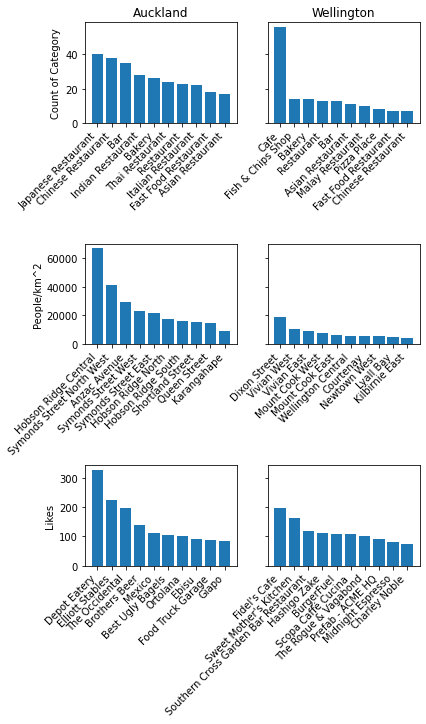

In [17]:
df_auck_categories = df_auck.groupby(['Venue Category'])['Venue'].count().reset_index()
df_auck_categories.rename(columns={'Venue': 'Count'}, inplace=True)
df_1 = df_auck_categories.sort_values(['Count'], ascending=False).reset_index(drop=True)
x1, y1 = df_1['Venue Category'][0:10], df_1['Count'][0:10]

df_welly_categories = df_welly.groupby(['Venue Category'])['Venue'].count().reset_index()
df_welly_categories.rename(columns={'Venue': 'Count'}, inplace=True)
df_2 = df_welly_categories.sort_values(['Count'], ascending=False).reset_index(drop=True)
x2, y2 = df_2['Venue Category'][0:10], df_2['Count'][0:10]

df_3 = df_auckland_population.\
    nlargest(10, columns=['PopulationDensity']).\
    sort_values(['PopulationDensity'], ascending=False)
x3, y3 = df_3['Suburb'][0:10], df_3['PopulationDensity'][0:10]

df_4 = df_wellington_population.\
    nlargest(10, columns=['PopulationDensity']).\
    sort_values(['PopulationDensity'], ascending=False)
x4, y4 = df_4['Suburb'][0:10], df_4['PopulationDensity'][0:10]

df_5 = df_auck.\
    nlargest(10, columns=['likes']).\
    sort_values(['likes'], ascending=False)#.\
    #plot.barh(x='Venue', y='likes', title='Top 10 Venues by Likes - Auckland')
x5, y5 = df_5['Venue'][0:10], df_5['likes'][0:10]
    
df_6 = df_welly.\
    nlargest(10, columns=['likes']).\
    sort_values(['likes'], ascending=False)#.\
    #plot.barh(x='Venue', y='likes', title='Top 10 Venues by Likes - Wellington')
x6, y6 = df_6['Venue'][0:10], df_6['likes'][0:10]

x = range(10)
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, sharey='row', figsize=(6,10))
ax1.bar(x, y1)
ax1.set_xticks(x)
ax1.set_xticklabels(x1, rotation=45, ha='right')
ax1.set_ylabel('Count of Category')
ax1.set_title('Auckland')
ax2.bar(x, y2)
ax2.set_xticks(x)
ax2.set_xticklabels(x2, rotation=45, ha='right')
ax2.set_title('Wellington')
ax3.bar(x, y3)
ax3.set_xticks(x)
ax3.set_xticklabels(x3, rotation=45, ha='right')
ax3.set_ylabel('People/km^2')
ax4.bar(x, y4)
ax4.set_xticks(x)
ax4.set_xticklabels(x4, rotation=45, ha='right')
ax5.bar(x, y5)
ax5.set_xticks(x)
ax5.set_xticklabels(x5, rotation=45, ha='right')
ax5.set_ylabel('Likes')
ax6.bar(x, y6)
ax6.set_xticks(x)
ax6.set_xticklabels(x6, rotation=45, ha='right')
print('Figures 1, 2, 3')
fig.subplots_adjust(hspace=1.2)

**Question 2** - Is there a correlation between Population Denisty & Number of Venues?

Draw scatter plots of Venue Counts against the suburbs' population and area and fit a regression line.

Figures 4,5,6


(0.0, 75.0)

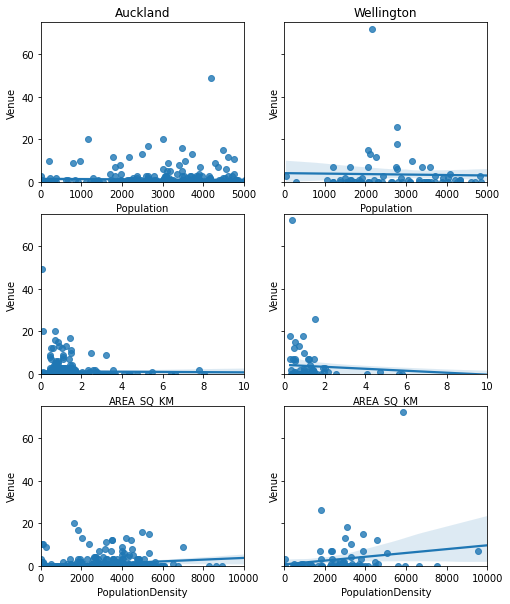

In [18]:
_df_1 = df_auck.groupby(['Suburb'])['Venue'].count().reset_index()
df_auck_neighbourhood_venues = df_auckland_population.merge(_df_1, how='left', on='Suburb')
df_auck_neighbourhood_venues = df_auck_neighbourhood_venues.fillna(0)

_df_2 = df_welly.groupby(['Suburb'])['Venue'].count().reset_index()
df_welly_neighbourhood_venues = df_wellington_population.merge(_df_2, how='left', on='Suburb')
df_welly_neighbourhood_venues = df_welly_neighbourhood_venues.fillna(0)

print('Figures 4,5,6')
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2, sharey='row', figsize=(8,10))
sns.regplot(x="Population", y="Venue", ax=ax1, data=df_auck_neighbourhood_venues)
sns.regplot(x="Population", y="Venue", ax=ax2, data=df_welly_neighbourhood_venues)
sns.regplot(x="AREA_SQ_KM", y="Venue", ax=ax3, data=df_auck_neighbourhood_venues)
sns.regplot(x="AREA_SQ_KM", y="Venue", ax=ax4, data=df_welly_neighbourhood_venues)
sns.regplot(x="PopulationDensity", y="Venue", ax=ax5, data=df_auck_neighbourhood_venues)
sns.regplot(x="PopulationDensity", y="Venue", ax=ax6, data=df_welly_neighbourhood_venues)
ax1.set_title('Auckland')
ax2.set_title('Wellington')
ax1.set_xlim(0, 5000)
ax2.set_xlim(0,5000)
ax3.set_xlim(0,10)
ax4.set_xlim(0,10)
ax5.set_xlim(0,10000)
ax6.set_xlim(0,10000)
ax1.set_ylim(0, 75)
ax3.set_ylim(0, 75)
ax5.set_ylim(0, 75)

Calculate the Intercept and Coefficient's that describe the linear regression lines.

In [19]:
from sklearn.linear_model import LinearRegression
lm_a = LinearRegression()
lm_a.fit(df_auck_neighbourhood_venues[['PopulationDensity']], df_auck_neighbourhood_venues[['Venue']])
print(f'Auckland PopulationDensity vs Venue Count - Intercept: {lm_a.intercept_}, coefficient: {lm_a.coef_}')
lm_w = LinearRegression()
lm_w.fit(df_welly_neighbourhood_venues[['PopulationDensity']], df_welly_neighbourhood_venues[['Venue']])
print(f'Wellington PopulationDensity vs Venue Count - Intercept: {lm_w.intercept_}, coefficient: {lm_w.coef_}')

Auckland PopulationDensity vs Venue Count - Intercept: [-0.35194771], coefficient: [[0.00040488]]
Wellington PopulationDensity vs Venue Count - Intercept: [0.65257099], coefficient: [[0.000896]]


**Question 3** - What are the most popular Venue Categories?

Group by 'Venue Category' and sum the 'likes'.

Figure 7


Text(0.5, 1.0, 'Wellington')

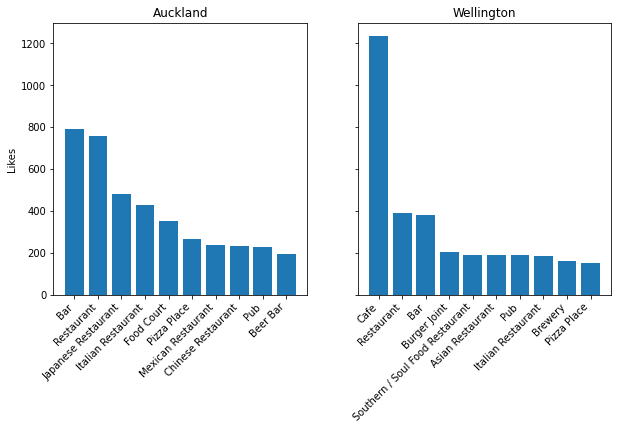

In [20]:
a_likes = df_auck.groupby(['Venue Category'])['likes'].sum().reset_index()
w_likes = df_welly.groupby(['Venue Category'])['likes'].sum().reset_index()

a_likes= a_likes.sort_values(['likes'], ascending=False).reset_index(drop=True)
w_likes = w_likes.sort_values(['likes'], ascending=False).reset_index(drop=True)

x1, y1 = a_likes['Venue Category'][0:10], a_likes['likes'][0:10]
x2, y2 = w_likes['Venue Category'][0:10], w_likes['likes'][0:10]

x = range(10)
print('Figure 7')
fig, [ax1, ax2]= plt.subplots(1, 2, sharey='row', figsize=(10,5))
ax1.bar(x, y1)
ax1.set_xticks(x)
ax1.set_xticklabels(x1, rotation=45, ha='right')
ax1.set_ylabel('Likes')
ax1.set_title('Auckland')
ax2.bar(x, y2)
ax2.set_xticks(x)
ax2.set_xticklabels(x2, rotation=45, ha='right')
ax2.set_title('Wellington')

### Cluster Analysis

**Question 4** - How do suburbs in each city cluster?

In [21]:
from sklearn.cluster import KMeans

**Use One-hot encoding to prepare Auckland data set for clustering**

In [22]:
df_ack1 = pd.get_dummies(df_auck[['Venue Category']], prefix="", prefix_sep="")
df_ack1[['Suburb', 'likes']] = df_auck[['Suburb', 'likes']]
df_ack1_hot = df_ack1.merge(df_auckland_population[['PopulationDensity', 'Suburb']], how='left', on='Suburb')
df_ack1_hot = df_ack1_hot.groupby('Suburb').mean().reset_index()
df_ack1_hot['likes'] = df_ack1_hot['likes'] / df_ack1_hot['likes'].max()
df_ack1_hot['PopulationDensity'] = df_ack1_hot['PopulationDensity'] / df_ack1_hot['PopulationDensity'].max()
df_ack1_hot.head()

Suburb  African Restaurant  American Restaurant  \
0          Akoranga                 0.0                  0.0   
1    Albany Central                 0.0                  0.0   
2      Anzac Avenue                 0.0                  0.0   
3    Aorere Central                 0.0                  0.0   
4  Auckland Airport                 0.0                  0.0   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  BBQ Joint  \
0                     0.0               0.0                    0.0        0.0   
1                     0.0               0.0                    0.0        0.0   
2                     0.0               0.0                    0.0        0.0   
3                     0.0               0.0                    0.0        0.0   
4                     0.0               0.0                    0.0        0.0   

   Bagel Shop  Bakery  Bar  ...  Sushi Restaurant  Tapas Restaurant  \
0         0.0     0.0  0.0  ...              0.00               0.0   
1         0.0     0.0  0.0  ...              0.00               0.0   
2         0.0     0.0  0.1  ...              0.05               0.0   
3         0.0     0.0  0.0  ...              0.00               0.0   
4         0.0     0.0  0.0  ...              1.00               0.0   

   Thai Restaurant  Turkish Restaurant  Vegetarian / Vegan Restaurant  \
0         0.000000                 0.0                            0.0   
1         0.111111                 0.0                            0.0   
2         0.000000                 0.0                            0.0   
3         0.083333                 0.0                            0.0   
4         0.000000                 0.0                            0.0   

   Vietnamese Restaurant  Wine Bar  Yakitori Restaurant     likes  \
0                   0.00  0.000000                 0.00  0.092254   
1                   0.00  0.111111                 0.00  0.181579   
2                   0.05  0.000000                 0.05  0.844782   
3                   0.00  0.000000                 0.00  0.505200   
4                   0.00  0.000000                 0.00  0.105433   

   PopulationDensity  
0           0.016719  
1           0.003754  
2           0.441339  
3           0.052751  
4           0.000422  

[5 rows x 71 columns]

Figure 8


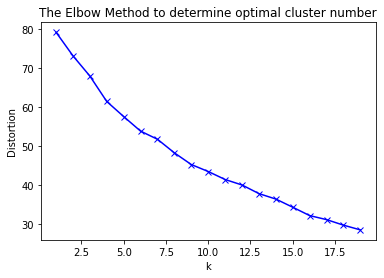

In [23]:
df_ack_clustering = df_ack1_hot.drop('Suburb', 1)
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_ack_clustering)
    distortions.append(kmeanModel.inertia_)

print('Figure 8')
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine optimal cluster number')
plt.show()

**Use One-hot encoding to prepare Wellington data set for clustering**

In [24]:
df_welly1 = pd.get_dummies(df_welly[['Venue Category']], prefix="", prefix_sep="")
df_welly1[['Suburb', 'likes']] = df_welly[['Suburb', 'likes']]
df_welly1_hot = df_welly1.merge(df_wellington_population[['PopulationDensity', 'Suburb']], how='left', on='Suburb')
df_welly1_hot = df_welly1_hot.groupby('Suburb').mean().reset_index()
df_welly1_hot['likes'] = df_welly1_hot['likes'] / df_welly1_hot['likes'].max()
df_welly1_hot['PopulationDensity'] = df_welly1_hot['PopulationDensity'] / df_welly1_hot['PopulationDensity'].max()
df_welly1_hot.head()

Suburb  American Restaurant  Argentinian Restaurant  \
0          Aro Valley                  0.0                     0.0   
1          Berhampore                  0.0                     0.0   
2       Brooklyn East                  0.0                     0.0   
3  Churton Park North                  0.0                     0.0   
4           Courtenay                  0.0                     0.0   

   Asian Restaurant  BBQ Joint  Bagel Shop    Bakery       Bar  Beer Bar  \
0          0.000000        0.0    0.000000  0.250000  0.000000  0.250000   
1          0.000000        0.0    0.000000  0.000000  0.000000  0.000000   
2          0.000000        0.0    0.000000  0.055556  0.222222  0.000000   
3          0.000000        0.0    0.000000  0.000000  0.000000  0.000000   
4          0.055556        0.0    0.013889  0.000000  0.027778  0.013889   

    Brewery  ...  Steakhouse  Sushi Restaurant  Tapas Restaurant  \
0  0.000000  ...         0.0          0.000000          0.000000   
1  0.000000  ...         0.0          0.000000          0.000000   
2  0.111111  ...         0.0          0.000000          0.000000   
3  0.000000  ...         0.0          0.000000          0.000000   
4  0.041667  ...         0.0          0.013889          0.013889   

   Thai Restaurant  Turkish Restaurant  Vegetarian / Vegan Restaurant  \
0         0.000000                 0.0                       0.000000   
1         0.000000                 0.0                       0.000000   
2         0.000000                 0.0                       0.000000   
3         0.000000                 0.0                       0.000000   
4         0.041667                 0.0                       0.013889   

   Vietnamese Restaurant  Wine Bar     likes  PopulationDensity  
0               0.000000  0.000000  0.315789           0.175492  
1               0.000000  0.000000  0.017544           0.154632  
2               0.000000  0.000000  0.671540           0.164260  
3               0.000000  0.000000  0.017544           0.049262  
4               0.027778  0.013889  0.627437           0.313329  

[5 rows x 59 columns]

Figure 9


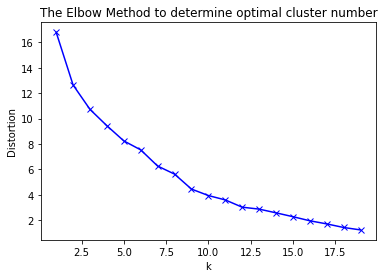

In [25]:
df_welly_clustering = df_welly1_hot.drop('Suburb', 1)
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_welly_clustering)
    distortions.append(kmeanModel.inertia_)

print('Figure 9')
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine optimal cluster number')
plt.show()

In [26]:
#_df = df_auck.rename(columns={'Neighbourhood': 'Suburb'})
df_a = df_auck.merge(df_auckland_population, how='left', on='Suburb')
df_a = df_a[['Suburb', 'Population', 'AREA_SQ_KM', 'Venue Category', 'likes']]
df_a.head()

Suburb  Population  AREA_SQ_KM        Venue Category  likes
0        Akoranga        1290    1.162911  Fast Food Restaurant      7
1        Akoranga        1290    1.162911        Sandwich Place      0
2  Albany Central         800    3.210054  Fast Food Restaurant     14
3  Albany Central         800    3.210054   Japanese Restaurant     11
4  Albany Central         800    3.210054    Italian Restaurant     17

In [27]:
df_pop_all = pd.concat([df_wellington_population, df_auckland_population])
df_all = pd.concat([df_auck, df_welly])
df_all_1 = pd.get_dummies(df_all[['Venue Category']], prefix="", prefix_sep="")

df_all_1[['Suburb', 'likes']] = df_all[['Suburb', 'likes']]

#df_all_1.rename(columns={'Neighbourhood': 'Suburb'}, inplace=True)

df_all_1_hot = df_all_1.merge(df_pop_all[['PopulationDensity', 'Suburb']], how='left', on='Suburb')

df_all_1_hot = df_all_1_hot.groupby('Suburb').mean().reset_index()

df_all_1_hot['likes'] = df_all_1_hot['likes'] / df_all_1_hot['likes'].max()
df_all_1_hot['PopulationDensity'] = df_all_1_hot['PopulationDensity'] / df_all_1_hot['PopulationDensity'].max()
df_all_1_hot.head()

Suburb  African Restaurant  American Restaurant  \
0        Akoranga                 0.0                  0.0   
1  Albany Central                 0.0                  0.0   
2    Anzac Avenue                 0.0                  0.0   
3  Aorere Central                 0.0                  0.0   
4      Aro Valley                 0.0                  0.0   

   Argentinian Restaurant  Asian Restaurant  Australian Restaurant  BBQ Joint  \
0                     0.0               0.0                    0.0        0.0   
1                     0.0               0.0                    0.0        0.0   
2                     0.0               0.0                    0.0        0.0   
3                     0.0               0.0                    0.0        0.0   
4                     0.0               0.0                    0.0        0.0   

   Bagel Shop  Bakery  Bar  ...  Sushi Restaurant  Tapas Restaurant  \
0         0.0    0.00  0.0  ...              0.00               0.0   
1         0.0    0.00  0.0  ...              0.00               0.0   
2         0.0    0.00  0.1  ...              0.05               0.0   
3         0.0    0.00  0.0  ...              0.00               0.0   
4         0.0    0.25  0.0  ...              0.00               0.0   

   Thai Restaurant  Turkish Restaurant  Vegetarian / Vegan Restaurant  \
0         0.000000                 0.0                            0.0   
1         0.111111                 0.0                            0.0   
2         0.000000                 0.0                            0.0   
3         0.083333                 0.0                            0.0   
4         0.000000                 0.0                            0.0   

   Vietnamese Restaurant  Wine Bar  Yakitori Restaurant     likes  \
0                   0.00  0.000000                 0.00  0.061404   
1                   0.00  0.111111                 0.00  0.120858   
2                   0.05  0.000000                 0.05  0.562281   
3                   0.00  0.000000                 0.00  0.336257   
4                   0.00  0.000000                 0.00  0.315789   

   PopulationDensity  
0           0.016719  
1           0.003754  
2           0.441339  
3           0.052751  
4           0.049465  

[5 rows x 80 columns]

Figure 10 


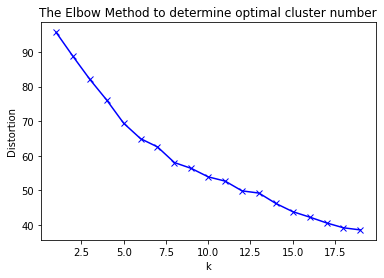

In [28]:
df_all_clustering = df_all_1_hot.drop('Suburb', 1)
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_all_clustering)
    distortions.append(kmeanModel.inertia_)

print('Figure 10 ')
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to determine optimal cluster number')
plt.show()

In [29]:
k = 5
full_model = KMeans(n_clusters=k)
full_model.fit(df_all_clustering)

df_all_1_hot.insert(0, 'Cluster Labels', full_model.labels_)
df_all.rename(columns={'Neighbourhood': 'Suburb'}, inplace=True)

In [30]:
df_food_clusters = df_all_1_hot[['Suburb', 'Cluster Labels']].merge(df_all, how='left', on='Suburb')
df_food_clusters.head()

Suburb  Cluster Labels                  Venue ID  likes   Latitude  \
0        Akoranga               3  4bb9a266b35776b0460bca01      7 -36.795381   
1        Akoranga               3  4cd9917753a7f04dd0fd6816      0 -36.795381   
2  Albany Central               1  5369d967498e6813f3ceb4a9     14 -36.848055   
3  Albany Central               1  5188ba6a498ef922678318a7     11 -36.848055   
4  Albany Central               1  4b555951f964a5202de227e3     17 -36.848055   

    Longitude       Venue  Venue Latitude  Venue Longitude  \
0  174.753052  McDonald's      -36.792846       174.748569   
1  174.753052      Subway      -36.796715       174.757168   
2  174.735100   Fishsmith      -36.845485       174.735505   
3  174.735100      Janken      -36.845239       174.737405   
4  174.735100     Andiamo      -36.845449       174.735870   

         Venue Category      City  
0  Fast Food Restaurant  Auckland  
1        Sandwich Place  Auckland  
2  Fast Food Restaurant  Auckland  
3   Japanese Restaurant  Auckland  
4    Italian Restaurant  Auckland

In [31]:
# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [32]:
map_wellington = folium.Map(location=[-41.28489352399998, 174.77610046600012], zoom_start=12)
for lat, lng, suburb, cluster in zip(df_food_clusters['Latitude'], df_food_clusters['Longitude'], df_food_clusters['Suburb'], df_food_clusters['Cluster Labels']):
    label = '{} - Cluster {}'.format(suburb, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_wellington)
map_wellington

In [33]:
map_auckland = folium.Map(location=[-36.84837877599995, 174.76438177700004], zoom_start=12)
for lat, lng, suburb, cluster in zip(df_food_clusters['Latitude'], df_food_clusters['Longitude'], df_food_clusters['Suburb'], df_food_clusters['Cluster Labels']):
    label = '{} - Cluster {}'.format(suburb, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_auckland)
map_auckland

In [34]:
#df_all_1_hot.head()
df_all_1_hot_2 = df_all_1_hot
df_all_clustering_2 = df_all_1_hot.drop(['Suburb', 'likes', 'PopulationDensity'], axis=1)
full_model_2 = KMeans(n_clusters=k)
full_model_2.fit(df_all_clustering_2)

df_all_1_hot_2.insert(0, 'Cluster Labels 2', full_model_2.labels_)
#df_all.rename(columns={'Neighbourhood': 'Suburb'}, inplace=True)
df_food_clusters_2 = df_all_1_hot_2[['Suburb', 'Cluster Labels 2']].merge(df_all, how='left', on='Suburb')
df_food_clusters_2.head()

Suburb  Cluster Labels 2                  Venue ID  likes  \
0        Akoranga                 2  4bb9a266b35776b0460bca01      7   
1        Akoranga                 2  4cd9917753a7f04dd0fd6816      0   
2  Albany Central                 0  5369d967498e6813f3ceb4a9     14   
3  Albany Central                 0  5188ba6a498ef922678318a7     11   
4  Albany Central                 0  4b555951f964a5202de227e3     17   

    Latitude   Longitude       Venue  Venue Latitude  Venue Longitude  \
0 -36.795381  174.753052  McDonald's      -36.792846       174.748569   
1 -36.795381  174.753052      Subway      -36.796715       174.757168   
2 -36.848055  174.735100   Fishsmith      -36.845485       174.735505   
3 -36.848055  174.735100      Janken      -36.845239       174.737405   
4 -36.848055  174.735100     Andiamo      -36.845449       174.735870   

         Venue Category      City  
0  Fast Food Restaurant  Auckland  
1        Sandwich Place  Auckland  
2  Fast Food Restaurant  Auckland  
3   Japanese Restaurant  Auckland  
4    Italian Restaurant  Auckland

In [35]:
map_wellington = folium.Map(location=[-41.28489352399998, 174.77610046600012], zoom_start=12)
for lat, lng, suburb, cluster in zip(df_food_clusters_2['Latitude'], df_food_clusters_2['Longitude'], df_food_clusters_2['Suburb'], df_food_clusters_2['Cluster Labels 2']):
    label = '{} - Cluster {}'.format(suburb, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_wellington)
map_wellington

In [36]:
map_auckland = folium.Map(location=[-36.84837877599995, 174.76438177700004], zoom_start=12)
for lat, lng, suburb, cluster in zip(df_food_clusters_2['Latitude'], df_food_clusters_2['Longitude'], df_food_clusters_2['Suburb'], df_food_clusters_2['Cluster Labels 2']):
    label = '{} - Cluster {}'.format(suburb, cluster)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7,
        parse_html=False).add_to(map_auckland)
map_auckland

In [37]:
_df = df_food_clusters.groupby(['City', 'Cluster Labels'])['Suburb'].count().reset_index()
_df.rename(columns={'Suburb': 'Count'})
_df

City  Cluster Labels  Suburb
0    Auckland               0      17
1    Auckland               1     465
2    Auckland               2       8
3    Auckland               3      10
4  Wellington               1     223
5  Wellington               2       6
6  Wellington               3       3
7  Wellington               4      37

In [38]:
_df2 = df_food_clusters_2.groupby(['City', 'Cluster Labels 2'])['Suburb'].count().reset_index()
_df2.rename(columns={'Suburb': 'Count'})
_df2

City  Cluster Labels 2  Suburb
0    Auckland                 0     465
1    Auckland                 2      10
2    Auckland                 3       8
3    Auckland                 4      17
4  Wellington                 0     223
5  Wellington                 1      37
6  Wellington                 2       3
7  Wellington                 3       6

Figure 11


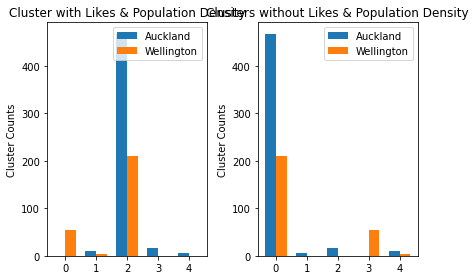

In [39]:
#_df.plot.bar()
labels = [0, 1, 2, 3, 4]
auckland1 = [0, 10, 468, 17, 5]
wellington1 = [55, 3, 211, 0, 0]

auckland2 = [468, 5, 17, 0, 10]
wellington2 = [211, 0, 0, 55, 3]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.bar(x - width/2, auckland1, width, label='Auckland')
ax1.bar(x + width/2, wellington1, width, label='Wellington')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Cluster Counts')
ax1.set_title('Cluster with Likes & Population Density')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

ax2.bar(x - width/2, auckland2, width, label='Auckland')
ax2.bar(x + width/2, wellington2, width, label='Wellington')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Cluster Counts')
ax2.set_title('Clusters without Likes & Population Density')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()

fig.tight_layout()

print('Figure 11')
plt.show()

## 4 Discussion

The aim of this study was to understand if the two cities Auckland and Wellington had a unique food scence and whether the population density of the suburbs had a role in defining the food scene. This is useful to understand for tourists that may wish to plan a trip based on a desirable food experience, or restauranturs that intend to capatilise on a cities repuatation. In this report we extracted venue information and popularity (likes) from the FourSquare API, and also included population data scraped from public websites.

Exploratory data analysis was performed comparing the Venue Category Count, Suburb Popoulation Density, and Venue Populatory for both Auckland and Wellington (Figure 1). A striking result is Wellington having almost 60 cafes as the top venue category compared to the 40 Japanese Restuarants for Auckland. What is also interesting to note is the dramatic drop from 60 down to under 20 for the 2nd most common venue category in Wellington. Auckland in comparison has a steady drop off and only gets to under 20 by the 10th most common venue category.

Auckland, predictably, has the most populous suburbs.  Wellington's most populous suburb is comparable to Auckland's 5th most populous suburb (Figure 2). Interestingly, the higher population in Auckland does not translate to a significant increase in populatory (likes) compared to Wellington. Auckland's most liked venue Depot Eatery scored only 50% more likes than Wellington's most liked venue Fidels Cafe, with 300 and 200 likes respectively (Figure 3). This could be explained either by Wellington venues being more poplar than Auckland venues or, Wellington FourSquare users are more likely to review a venue than their Auckland counterparts. What can be concluded from Figures 1-3 is Wellington has a distinct profile of venues compared to Auckland.

The effect of population density on venue counts was investigated by plotting the venue count against suburb population, suburb area, and suburb population/area (population density) (Figures 4, 5, 6 respectively). A linear regression was applied to determine if there is a correlation between venue count and populatoin density. With linear coefficients close to 0, it can be concluded that population density does not affect the number of venues that are in a suburb.

K-means clustering was chosen to identify if Auckland and Wellington had unique venue categories. Clustering was performed with and without venue likes and population density to understand if these parameters influenced how venues cluster. By calculating the distortion for a range of k-clusters it can be seen in Figure 10 and elbow occurs at k=5. Figure 11 displays the clustering profile with and without venue likes and population density parameters, which shows identical profiles. This would indicate that likes/popularity and population density do not affect the venue profile of a suburb. What is interesting about the clustering profiles is that Wellington has unique cluster. 

To conclude we can see that Wellington and Auckland do have unqiue venue experiences, which do not appear to be affected by suburb population density. These results provide an insight into the restuarant scene in New Zealand, which is useful to understand for potential tourists wanting the best food experience.


## 5 References

[1] https://www.theurbanlist.com/nz/a-list/best-restaurants-wellington

[2] https://thespinoff.co.nz/partner/woap2019/07-08-2019/why-wellington-is-the-worlds-best-food-city/

[3] https://travel.nine.com.au/destinations/wellington-new-zealand-foodie-guide-eat-and-drink/e724be81-e8c6-4867-a536-063265968318

[4] https://en.wikipedia.org/wiki/Auckland

[5] https://en.wikipedia.org/wiki/Wellington

[6] https://www.citypopulation.de/en/newzealand/wellington/

[7] https://www.citypopulation.de/en/newzealand/auckland/